In [1]:
import pandas as pd
import numpy as np

In [2]:
fao = pd.read_csv('../data/FAOSTAT_data_8-28-2020.csv', low_memory=False)
wfp = pd.read_csv('../data/wfpvam_foodprices.csv', low_memory=False)

In [3]:
fao.sample(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
44076,PP,Producer Prices,60,El Salvador,5532,Producer Price (USD/tonne),497,Lemons and limes,2012,2012,7021,Annual value,USD,280.1,NaN,Official data
37800,PP,Producer Prices,167,Czechia,5532,Producer Price (USD/tonne),393,Cauliflowers and broccoli,2015,2015,7021,Annual value,USD,557.2,NaN,Official data
98885,PP,Producer Prices,169,Paraguay,5532,Producer Price (USD/tonne),1078,"Meat live weight, goose",2003,2003,7021,Annual value,USD,1254.4,Ce,Calculated data based on estimated data
46677,PP,Producer Prices,66,Fiji,5532,Producer Price (USD/tonne),1033,"Meat live weight, goat",2005,2005,7021,Annual value,USD,1904.2,Fc,Calculated data
75133,PP,Producer Prices,121,Lebanon,5532,Producer Price (USD/tonne),1020,"Milk, whole fresh goat",1996,1996,7021,Annual value,USD,572.7,NaN,Official data


In [4]:
fao.Item.value_counts()[:10]

Tomatoes                        2859
Maize                           2755
Potatoes                        2737
Eggs, hen, in shell             2736
Milk, whole fresh cow           2682
Meat live weight, cattle        2625
Meat live weight, chicken       2494
Cabbages and other brassicas    2394
Meat, cattle                    2315
Onions, dry                     2282
Name: Item, dtype: int64

In [5]:
food_avgs = wfp.groupby(['cm_name', 'mp_year'])['mp_price'].mean().unstack()

In [6]:
food_avgs.describe()

mp_year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,3.000000,3.000000,4.000000,4.000000,10.000000,12.000000,16.000000,17.000000,21.000000,21.000000,...,3.050000e+02,3.560000e+02,3.940000e+02,4.280000e+02,4.640000e+02,4.380000e+02,4.530000e+02,4.770000e+02,4.890000e+02,6.860000e+02
mean,108.648870,110.986408,83.327626,81.113417,70.184455,194.786743,304.387529,43049.442326,33828.693594,29926.688859,...,2.166988e+04,2.931703e+04,2.773986e+04,2.596866e+04,1.859602e+04,2.100593e+04,1.183745e+04,1.552961e+04,1.509468e+04,1.241542e+04
std,80.395104,67.566057,81.709494,83.226532,82.372694,364.319453,526.061464,144777.649348,130079.939218,113533.083289,...,3.150272e+05,3.498963e+05,3.418829e+05,3.383417e+05,2.005981e+05,2.214975e+05,1.029830e+05,1.487983e+05,1.231499e+05,8.798828e+04
min,58.695652,69.988636,1.527500,1.555000,1.322667,1.332500,1.688333,1.773333,1.110000,1.695000,...,1.600000e-01,4.370833e-01,2.664304e-01,4.512140e-01,4.524306e-01,2.485333e-01,1.700000e-01,2.316200e-01,2.422381e-01,1.866667e-01
25%,62.278861,71.994318,46.827188,44.567321,9.450700,5.094026,8.634119,9.633649,8.320890,8.404911,...,3.050000e+01,5.082443e+01,4.842211e+01,4.421568e+01,4.718272e+01,4.836250e+01,4.769313e+01,5.906708e+01,7.644073e+01,1.252021e+02
50%,65.862069,74.000000,67.697057,62.324334,51.549668,75.625643,111.487939,160.506024,171.372093,170.000000,...,2.316310e+02,3.987898e+02,4.430582e+02,4.604909e+02,4.261464e+02,3.647831e+02,3.478150e+02,3.982944e+02,5.263739e+02,7.650271e+02
75%,133.625479,131.485294,104.197496,98.870430,73.387636,118.528898,170.299842,1853.018868,1380.733333,1253.000000,...,1.341221e+03,1.800342e+03,2.050629e+03,2.919290e+03,2.451725e+03,2.293162e+03,2.419247e+03,2.583303e+03,3.013472e+03,3.400473e+03
max,201.388889,188.970588,196.388889,198.250000,255.763889,1225.000000,1668.098765,590833.500000,592625.000000,516000.000000,...,5.500053e+06,6.206308e+06,6.504234e+06,6.731328e+06,3.475853e+06,3.453254e+06,2.027340e+06,3.003641e+06,2.268161e+06,1.506778e+06


In [7]:
def fao_global_averages(data, food):
    '''
    take the FAO food prices table and a specific food
    return a Series representing the average global price per year
    '''
    prices = data[data.Item == food]
    return prices.groupby('Year').Value.mean()    

In [8]:
toms_avg = fao_global_averages(fao, 'Tomatoes')
maize_avg = fao_global_averages(fao, 'Maize')
pots_avg = fao_global_averages(fao, 'Potatoes')
milk_avg = fao_global_averages(fao, 'Milk, whole fresh cow')
beef_avg = fao_global_averages(fao, 'Meat live weight, cattle')

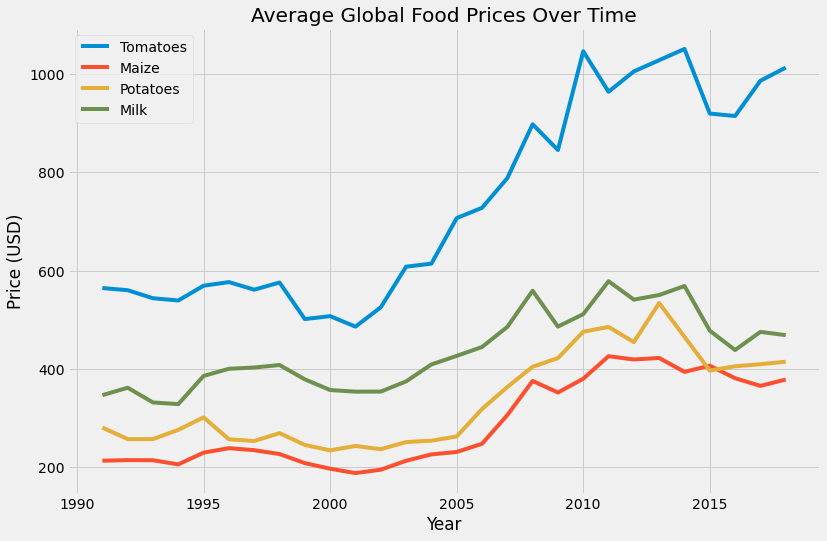

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(toms_avg, label='Tomatoes')
ax.plot(maize_avg, label='Maize')
ax.plot(pots_avg, label='Potatoes')
ax.plot(milk_avg, label='Milk')
ax.set_title('Average Global Food Prices Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Price (USD)')
ax.legend()

plt.savefig('../src/figures/prices_over_time.png')

**Note for tomorrow** make a data frame where each row is a COUNTRY and each column is a different year. the entries are average food price or something? maybe just the price of one food

then make a time series model for the countries.

worth a shot

In [10]:
maize = fao[fao.Item == 'Maize']

In [11]:
def fao_pivot(data, food):
    '''
    take the FAO data and the name of a food
    
    return the pivot table where the rows are the countries,
    the columns are the years, and the values are the values
    '''
    foods = data[data.Item == food]
    return foods.pivot(index='Area', columns='Year', values='Value')

In [12]:
maize_years = fao_pivot(fao, 'Maize')

In [13]:
maize_years.sample(5)

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Area,,,,,,,,,,,,,,,,,,,,,
Chile,145.7,146.6,143.3,161.0,171.6,211.8,161.1,148.2,139.8,127.6,...,197.1,220.6,292.4,67.5,85.5,75.9,204.1,190.6,204.1,209.5
Ethiopia PDR,291.8,250.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jordan,139.5,139.7,137.1,157.4,141.4,91.7,87.4,101.6,103.0,129.8,...,220.4,238.2,253.1,226.3,230.1,304.9,326.6,403.0,368.0,253.1
Niger,NaN,NaN,141.3,115.3,138.2,138.8,140.5,140.7,129.9,118.0,...,480.7,422.0,457.8,477.9,NaN,NaN,NaN,NaN,NaN,NaN
Slovenia,NaN,163.0,151.0,144.1,150.5,194.1,119.1,110.3,112.4,113.1,...,137.3,205.4,236.7,256.7,224.7,166.2,146.2,144.5,159.2,173.4


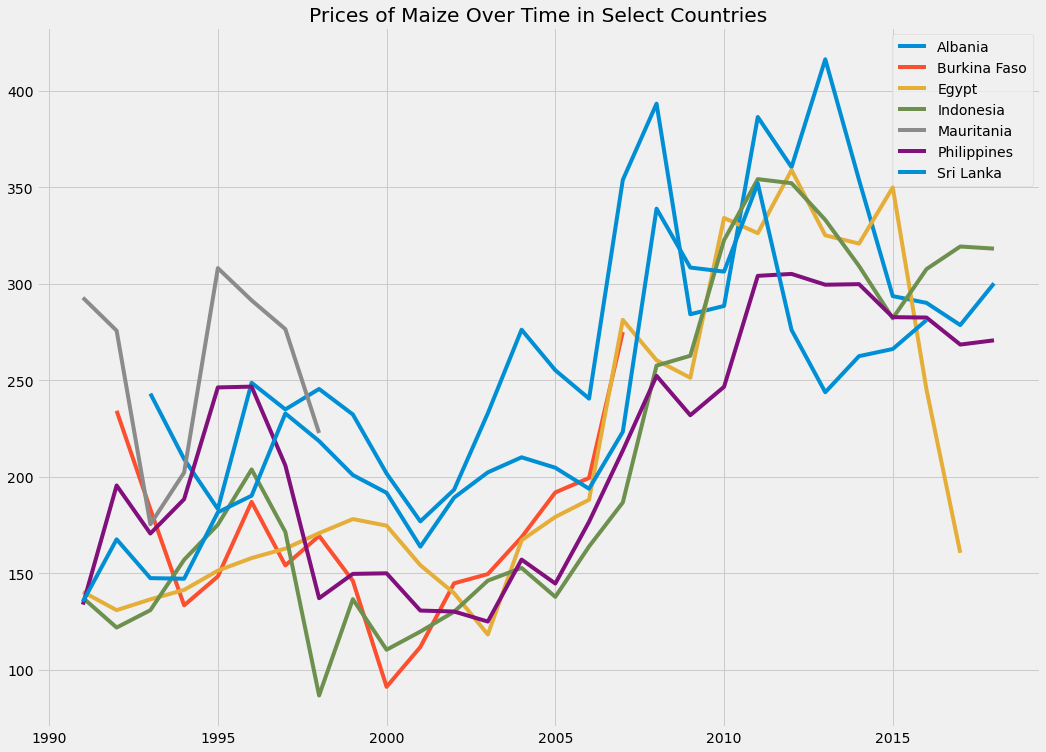

In [30]:
fig, ax = plt.subplots(figsize=(16,12))
for i in range(0, maize_years.shape[0], 20):
    data = maize_years.iloc[i]
    ax.plot(data.index, data.values, label=data.name)
ax.legend() 
ax.set_title('Prices of Maize Over Time in Select Countries')
plt.show()

In [23]:
print(maize_years.iloc[1].name)

Algeria
